In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

In [2]:
TCLab = tclab.setup(connected= True) #False, speedup=100)

Specifications

In [3]:
spans = 11
base_unit = 60*30 #Each span lasts base_unit seconds

q_init = 0
q_final = 100

setpoint = 30

In [4]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [5]:
str(datetime.timedelta(seconds=run_time)), increment

('5:30:00', 10.0)

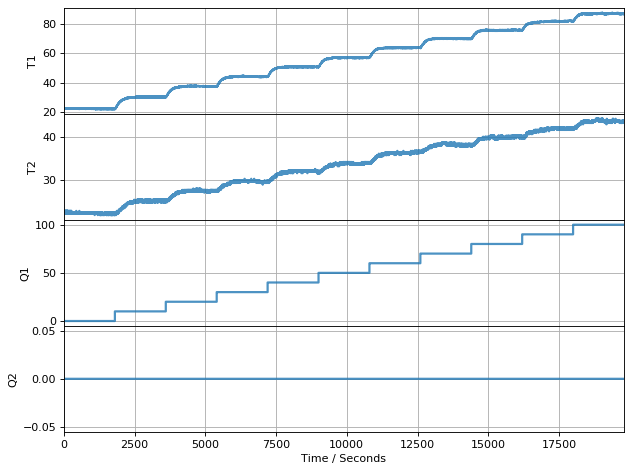

TCLab disconnected successfully.


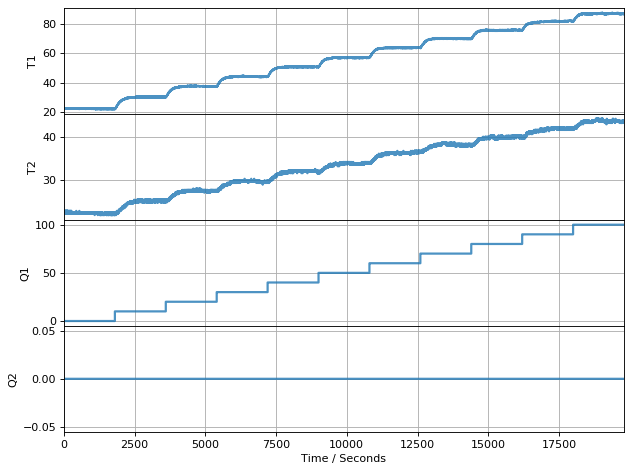

In [6]:
with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = q_init
    
    base_unit_checker = 1
    
    for t in tclab.clock(run_time):
        
        base_unit_counter = t/base_unit
        
        print(base_unit_counter, base_unit_checker, t)
        
        if base_unit_counter == base_unit_checker:
            
            base_unit_checker = base_unit_counter+1
            q_test += increment
        lab.Q1(q_test)
        tcplot.update(t)

In [7]:
h.get_sessions()

[(1, '2020-02-26 20:13:28', 19801)]

In [8]:
h.load_session(1)

In [9]:
data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [10]:
data_frame = pandas.DataFrame(data = data)
data_frame.to_csv("long_span_run 20200226 overnight")

In [11]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict['T1'], [2, 4, 100, 50])
[K, tau, theta, y0]

[509.12191523329597, 67241.93463809659, -41439.87815248762, -215.1710499156921]

[-0.7176563802220194, 2053.855298128427, -73.18866248091973, 22.808641418526705]
[22.78351819 22.78318108 22.78284414 ... 22.37969315 22.37955261
 22.37941215]
[7.937039338327233, 178.12547198830777, 21.036607414862637, 22.461818165664152]
[22.46181817 22.46181817 22.46181817 ... 30.3984863  30.39848838
 30.39849044]
[7.1536906324730705, 165.1448014291556, 20.926050477221434, 30.524285724070324]
[30.52428572 30.52428572 30.52428572 ... 37.67782365 37.67782458
 37.67782549]
[6.563112933153152, 149.8106323390278, 20.619820224235994, 37.68428567828369]
[37.68428568 37.68428568 37.68428568 ... 44.24735211 44.24735242
 44.24735273]
[6.506009888782758, 148.81426376393418, 20.30724937820573, 44.27761900886697]
[44.27761901 44.27761901 44.27761901 ... 50.78358641 50.78358669
 50.78358698]
[6.189974933177775, 141.0299746911965, 18.477229826459197, 50.7957894598908]
[50.79578946 50.79578946 50.79578946 ... 56.98574375 56.98574389
 56.98574404]
[6.413889462851305, 135.75806087229026, 23.422688783

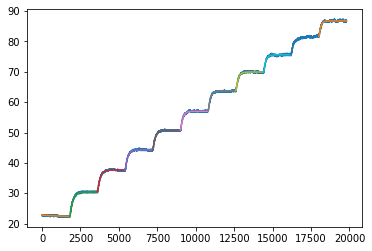

In [18]:
plt.plot(h.t, h.logdict['T1'])

for span in range(spans):
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict['T1'][lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
    print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
#     plt.plot(h.t, h.logdict['T1'])
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))

plt.savefig('steps.png', dpi = 300)

<Figure size 432x288 with 0 Axes>